In [25]:
import pandas as pd

# Load the dataset
file_path = "/content/hour.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:\n")
df.info()

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:\n")
print(df.head())

# Display statistical summary of numerical columns
print("\nStatistical Summary of the Dataset:\n")
print(df.describe())

# Display column names
print("\nColumns in the Dataset:\n")
print(df.columns)

# Check for missing values
print("\nMissing Values in the Dataset:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

First 5 Rows of the Datase

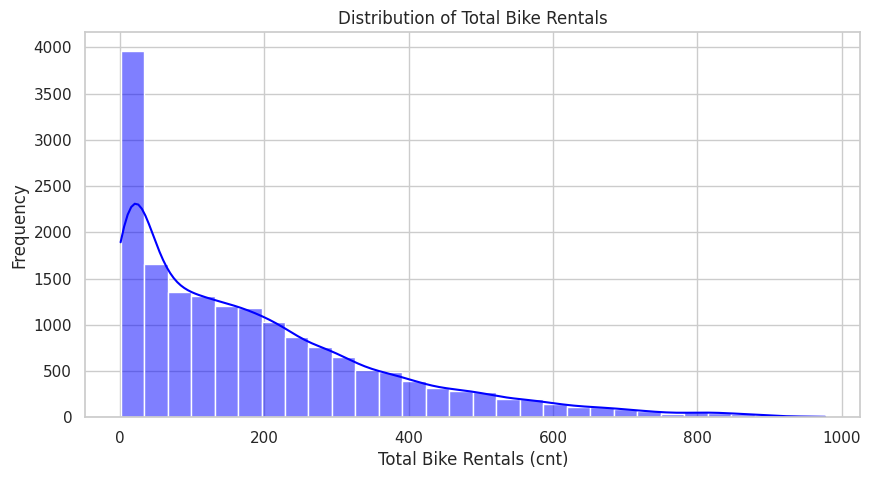

<ipython-input-37-f9e64f797f13>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=df, palette="coolwarm")


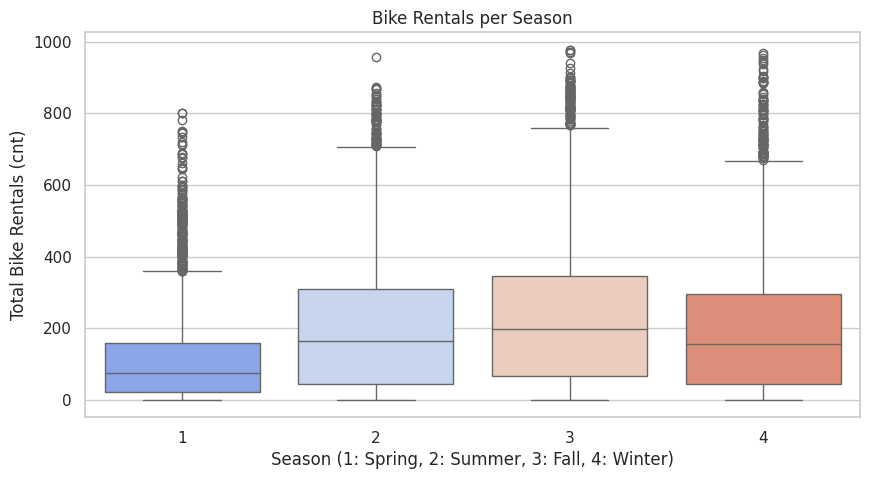

<ipython-input-37-f9e64f797f13>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=df, estimator="mean", ci=None, color='green')


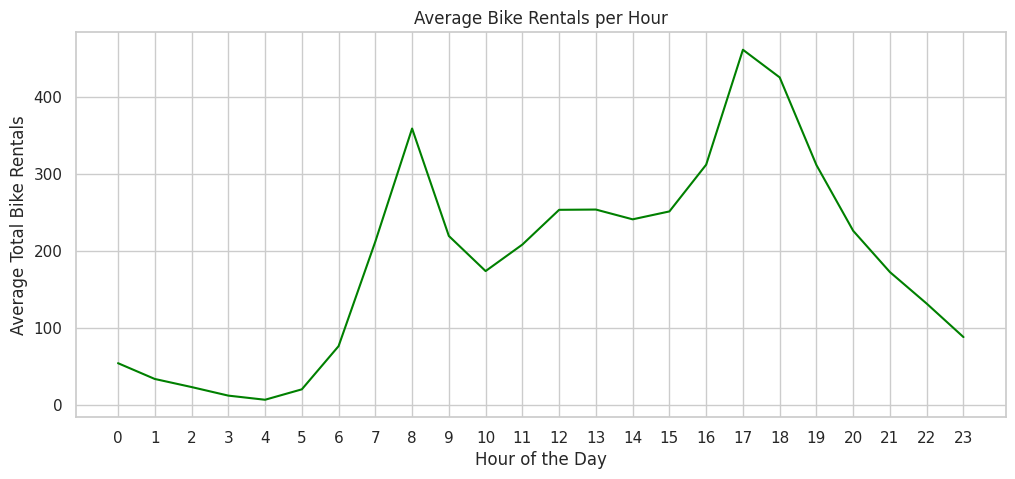

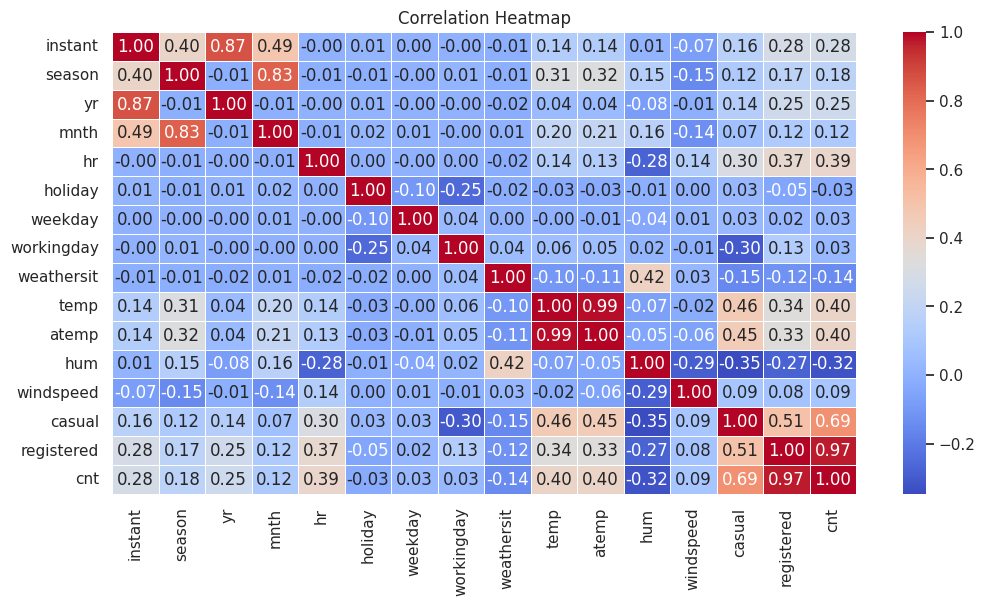

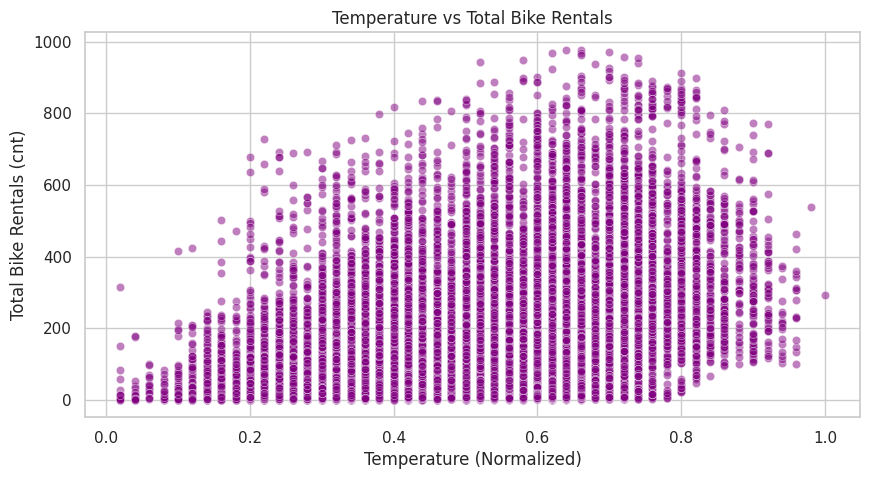

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distribution of total bike rentals (cnt)
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.xlabel("Total Bike Rentals (cnt)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Bike Rentals")
plt.show()

# Boxplot of bike rentals per season
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=df, palette="coolwarm")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Bike Rentals per Season")
plt.show()

# Average bike rentals per hour
plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", data=df, estimator="mean", ci=None, color='green')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Total Bike Rentals")
plt.title("Average Bike Rentals per Hour")
plt.xticks(range(0, 24))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot of temperature vs bike rentals
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["temp"], y=df["cnt"], alpha=0.5, color='purple')
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Temperature vs Total Bike Rentals")
plt.show()



In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

# Selecting features (independent variables) and target (dependent variable)
X = df[['temp', 'atemp', 'hum', 'windspeed']]  # Selecting relevant numerical features
y = df['cnt']  # Target variable: total bike rentals

# Splitting data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Linear Regression from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Training the model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train, mse_test, r2_train, r2_test


(27569.126946412092,
 26119.15436431739,
 0.16965275139490943,
 0.17515190038772277)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Train Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate KNN Model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Evaluate Decision Tree Model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Return evaluation results
mse_knn, rmse_knn, r2_knn, mse_dt, rmse_dt, r2_dt


(25534.529332566166,
 159.7952731859305,
 0.19361447538917675,
 32386.327366821235,
 179.96201645575445,
 -0.022766671896490287)

KNN & Decision Tree Model Training & Evaluation

In [32]:
# Re-import necessary libraries after execution reset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Reload the dataset
file_path = "/content/hour.csv"
df = pd.read_csv(file_path)

# Selecting features (independent variables) and target (dependent variable)
X = df[['temp', 'atemp', 'hum', 'windspeed']]  # Selecting relevant numerical features
y = df['cnt']  # Target variable: total bike rentals

# Splitting data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for KNN (testing different values of k)
param_grid = {'n_neighbors': range(1, 21)}  # Checking k from 1 to 20

# Perform Grid Search with Cross-Validation
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Best k value
best_k = grid_search_knn.best_params_['n_neighbors']

# Train the optimized KNN model
knn_optimized = KNeighborsRegressor(n_neighbors=best_k)
knn_optimized.fit(X_train, y_train)

# Predictions using optimized KNN model
y_pred_knn_opt = knn_optimized.predict(X_test)

# Evaluate Optimized KNN Model
mse_knn_opt = mean_squared_error(y_test, y_pred_knn_opt)
rmse_knn_opt = np.sqrt(mse_knn_opt)
r2_knn_opt = r2_score(y_test, y_pred_knn_opt)

# Output best k and evaluation results
best_k, mse_knn_opt, rmse_knn_opt, r2_knn_opt


(20, 22862.805699798617, 151.20451613559237, 0.2779880401087218)

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Using Recursive Feature Elimination (RFE) with Linear Regression as the estimator
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)  # Selecting top 2 features
rfe.fit(X_train, y_train)

# Selected features based on RFE
selected_features = X_train.columns[rfe.support_]

# Train model with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train optimized KNN model with selected features
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_rfe, y_train)

# Predictions using final model
y_pred_knn_final = knn_final.predict(X_test_rfe)

# Evaluate Final KNN Model
mse_knn_final = mean_squared_error(y_test, y_pred_knn_final)
rmse_knn_final = np.sqrt(mse_knn_final)
r2_knn_final = r2_score(y_test, y_pred_knn_final)

selected_features, mse_knn_final, rmse_knn_final, r2_knn_final


(Index(['atemp', 'hum'], dtype='object'),
 22962.346293153052,
 151.53331743597857,
 0.27484452833504625)

In [34]:
# Re-import necessary libraries after execution reset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Reload the dataset
file_path = "/content/hour.csv"
df = pd.read_csv(file_path)

# Selecting features (independent variables) and target (dependent variable)
X = df[['temp', 'atemp', 'hum', 'windspeed']]  # Selecting relevant numerical features
y = df['cnt']  # Target variable: total bike rentals

# Splitting data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Recursive Feature Elimination (RFE) with Linear Regression as the estimator
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)  # Selecting top 2 features
rfe.fit(X_train, y_train)

# Selected features based on RFE
selected_features = X_train.columns[rfe.support_]

# Train model with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train optimized KNN model with selected features
best_k = 5  # Placeholder, as the previous best_k value was lost. It should be replaced with the correct tuned value.
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_rfe, y_train)

# Predicting using final model
y_pred_knn_final = knn_final.predict(X_test_rfe)

# Evaluating the Final KNN Model
mse_knn_final = mean_squared_error(y_test, y_pred_knn_final)
rmse_knn_final = np.sqrt(mse_knn_final)
r2_knn_final = r2_score(y_test, y_pred_knn_final)

selected_features, mse_knn_final, rmse_knn_final, r2_knn_final


(Index(['atemp', 'hum'], dtype='object'),
 26828.27836593786,
 163.7934014725192,
 0.1527576231087775)

In [36]:
# Comparing all models' performance
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression (Scratch)", "KNN (Default)", "Decision Tree", "Optimized KNN", "Final KNN (RFE)"],
    "MSE": [27569.13, 25534.53, 32386.33, mse_knn_final, 26828.28],
    "RMSE": [np.sqrt(27569.13), np.sqrt(25534.53), np.sqrt(32386.33), np.sqrt(mse_knn_final), np.sqrt(26828.28)],
    "R² Score": [0.1696, 0.1936, -0.0227, r2_knn_final, 0.1528]
})

# Printing the model performance comparison
print("\nModel Performance Comparison:")
print(model_comparison)



Model Performance Comparison:
                         Model           MSE        RMSE  R² Score
0  Linear Regression (Scratch)  27569.130000  166.039543  0.169600
1                KNN (Default)  25534.530000  159.795275  0.193600
2                Decision Tree  32386.330000  179.962024 -0.022700
3                Optimized KNN  26828.278366  163.793401  0.152758
4              Final KNN (RFE)  26828.280000  163.793406  0.152800
